# 18.3  Capstone Two: Modeling

### Step 1: Importing and Preprocessing Data

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor



import statsmodels.api as sm

In [2]:
#Loading the two csv with and without dummy variables (one-hot variable)
df = pd.read_csv('data/insurance_r1.csv') 
df_r = pd.read_csv('data/insurance_regression.csv') 

In [3]:
df_r['SW'] = df_r['SW'].astype("category")
df_r['SE'] = df_r['SE'].astype("category")
df_r['NW'] = df_r['NW'].astype("category")
df_r['NE'] = df_r['NE'].astype("category")
df_r['children_0'] = df_r['children_0'].astype("category")
df_r['children_1'] = df_r['children_1'].astype("category")
df_r['children_2'] = df_r['children_2'].astype("category")
df_r['children_3'] = df_r['children_3'].astype("category")
df_r['children_4'] = df_r['children_4'].astype("category")
df_r['children_5'] = df_r['children_5'].astype("category")
df_r['smoker'] = df_r['smoker'].astype("category")
df_r['sex'] = df_r['sex'].astype("category")


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_r.drop('charges',axis=1), 
                                                    df_r.charges, test_size=0.3, 
                                                    random_state=47)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train[['age','bmi']])
X_train_s = X_train[['age','bmi']]
X_train_s[['age','bmi']] = scaler.transform(X_train[['age','bmi']])

X_train[['age','bmi']] = X_train_s[['age','bmi']]

<ipython-input-5-5c95f0f04a88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_s[['age','bmi']] = scaler.transform(X_train[['age','bmi']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
X_test_s = X_test[['age','bmi']]

X_test_s[['age','bmi']] = scaler.transform(X_test[['age','bmi']])

X_test[['age','bmi']] = X_test_s[['age','bmi']]

<ipython-input-6-0783e132a876>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_s[['age','bmi']] = scaler.transform(X_test[['age','bmi']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Part 1: Predicting Medical Cost - Continuous Value

### Model 1.1 -  Ordinary Least Squares (OLS)

Initial Model adopting all available Features

In [7]:
#Preprocessing Data for OLS
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [8]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sat, 13 Feb 2021   Prob (F-statistic):          7.66e-252
Time:                        10:34:24   Log-Likelihood:                -9472.6
No. Observations:                 935   AIC:                         1.897e+04
Df Residuals:                     922   BIC:                         1.903e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6462.7392    305.143     21.179      0.000    5863.884    7061.594
age           3686.3005    202.075     18.242      0.000    3289.720    4082.881
bmi           1772.7240    212.844      8.329      0.000    1355.008    2190.440
sex_1           70.4981    402.658      0.175      0.861    -719.735     860.731
smoker_1      2.268e+04    508.044     44.648      0.000    2.17e+04    2.37e+04
children_0_1    42.0528    416.949      0.101      0.920    -776.227     860.333
children_1_1   263.7529    474.098      0.556      0.578    -666.684    1194.190
children_2_1  1563.5188    523.927      2.984      0.003     535.290    2591.747
children_3_1   873.4268    600.356      1.455      0.146    -304.796    2051.650
children_4_1  2677.4248   1172.073      2.284      0.023     377.184    4977.666
children_5_1  1042.5631   1334.109      0.781      0.435   -1575.679    3660.805
SW_1          1426.1022    358.018      3.983      0.000     723.478    2128.726
SE_1          1242.4228    364.633      3.407      0.001     526.816    1958.030
NW_1          2113.1498    364.828      5.792      0.000    1397.160    2829.139
NE_1          1681.0644    364.648      4.610      0.000     965.427    2396.702
==============================================================================
Omnibus:                      230.569   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.089
Skew:                           1.337   Prob(JB):                    2.59e-114
Kurtosis:                       5.506   Cond. No.                     1.57e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the summary report, there are 5 features with P>|t| less than 0.05 which indicates their coefficent are not significantly different with 0 in 95% confident interval.

In [9]:
y_pred = results.predict(X_test)

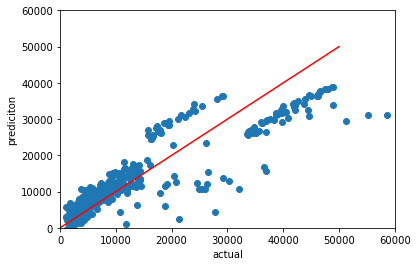

In [10]:
plt.scatter(y_test,y_pred)
plt.plot([0,50000],[0,50000],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 60000) 
plt.ylim(0, 60000) 
plt.show()

In [11]:
def RMSE(data,predict):
    return np.sqrt(np.sum(np.square(data - predict))/ len(data))
r2_1 = r2_score(y_test,y_pred)
rmse_1 = RMSE(y_test,y_pred)
print(r2_1,rmse_1)

0.7858084305592329 6033.379035930625


In [12]:
# Cross-validation for checking over-fitting
cv_results = cross_validate(LinearRegression(), X_train, y_train, cv=5)
cv_scores = cv_results['test_score']

cv_scores

array([0.74191919, 0.75267664, 0.73807811, 0.65529878, 0.71421073])

### Feature Selection - Recursive Feature Elimination and Cross-Validation Selection (RFECV)

In [13]:
rfc = LinearRegression()
rfecv = RFECV(estimator = rfc,cv = 5)
rfecv.fit(X_train,y_train)

RFECV(cv=5, estimator=LinearRegression())

In [14]:
print('Optimal number of features: {}'.format(rfecv.n_features_))
print(rfecv.grid_scores_)

Optimal number of features: 6
[0.59069904 0.700718   0.70666074 0.71788066 0.7213528  0.72160369
 0.72044172 0.72087768 0.72059875 0.7206226  0.72032893 0.72044438
 0.7204354  0.72043669 0.72043669]


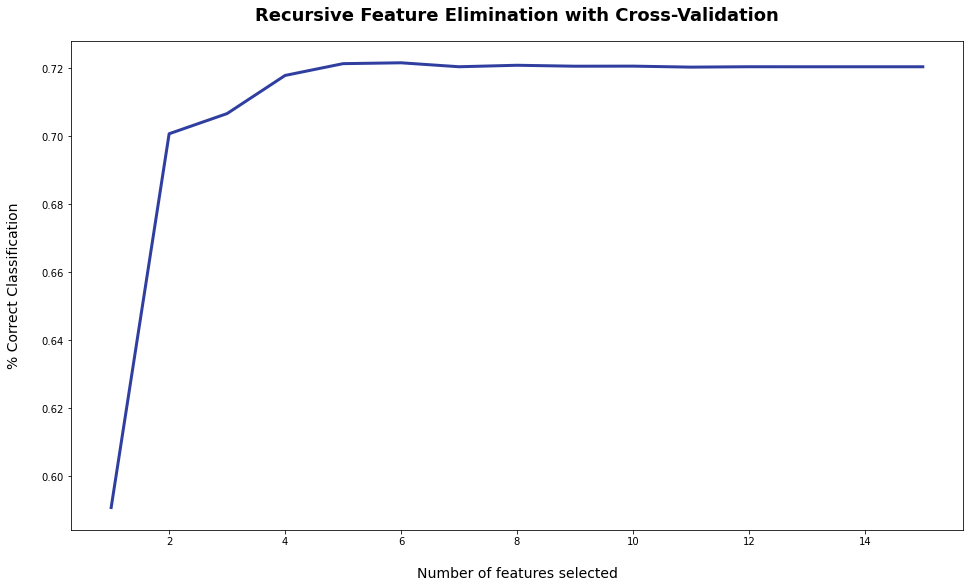

In [15]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [16]:
print(np.where(rfecv.support_ == False)[0])

X_train_rfe = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)
X_test_rfe = X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1)

[ 0  3  7  8 10 11 12 13 14]


From the result of RFECV, the optimal number of features is 6. Then, OLS with the 6 most important features will be constructed.

### Re-construct OLS by adopting the 6 most important features

In [17]:
model = sm.OLS(y_train,X_train_rfe)
results = model.fit()
results.summary()
y_pred = results.predict(X_test_rfe)

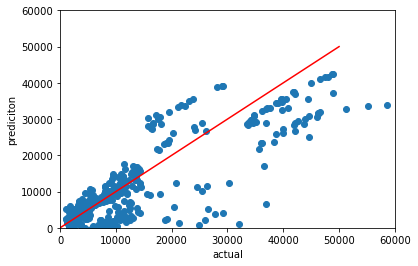

In [18]:
plt.scatter(y_test,y_pred)
plt.plot([0,50000],[0,50000],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 60000) 
plt.ylim(0, 60000) 
plt.show()

In [19]:
r2_2 = r2_score(y_test,y_pred)
rmse_2 = RMSE(y_test,y_pred)
print(r2_2,rmse_2)



0.6426552867427564 7792.971788732154


In [20]:
# Cross-validation for checking over-fitting
cv_results = cross_validate(LinearRegression(), X_train_rfe, y_train, cv=5)
cv_scores = cv_results['test_score']
cv_scores

array([0.74515079, 0.75237186, 0.74044558, 0.65611003, 0.71673524])

The model performance dropped if we only adopt the 6 most important features. Another approach is that we can only drop the 5 features which P>|t| is less than 0.05.

### Re-construct OLS by only dropping the 5 features which P>|t| is less than 0.05

In [21]:
X_train_p = X_train.drop(['sex_1','children_0_1','children_1_1','children_3_1','children_5_1'],axis = 1)
X_test_p = X_test.drop(['sex_1','children_0_1','children_1_1','children_3_1','children_5_1'],axis =1)


In [22]:
model = sm.OLS(y_train,X_train_p)
results = model.fit()
results.summary()
y_pred = results.predict(X_test_p)

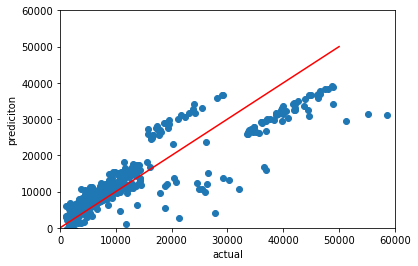

In [23]:
plt.scatter(y_test,y_pred)
plt.plot([0,50000],[0,50000],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 60000) 
plt.ylim(0, 60000) 
plt.show()

In [24]:
r2_3 = r2_score(y_test,y_pred)
rmse_3 = RMSE(y_test,y_pred)
print(r2_3,rmse_3)


0.7852270668531882 6041.5614558461575


In [25]:
# Cross-validation for checking over-fitting
cv_results = cross_validate(LinearRegression(), X_train_p, y_train, cv=5)
cv_scores = cv_results['test_score']

cv_scores

array([0.74884514, 0.75186106, 0.73845067, 0.65969583, 0.71449876])

### Summary of Model 1.1

In [26]:
print(zip((r2_1,r2_2,r2_3),(rmse_1,rmse_2,rmse_3)))

In [27]:
scores = pd.DataFrame(zip(('All Features','Best 6 Features','Drop 5 Features'),(r2_1,r2_2,r2_3),(rmse_1,rmse_2,rmse_3)),columns=['Model','R2 score','RMSE'],index=np.arange(1,4))
scores

,Model,R2 score,RMSE
1,All Features,0.785808,6033.379036
2,Best 6 Features,0.642655,7792.971789
3,Drop 5 Features,0.785227,6041.561456


The last model (Drop 5 Features) has been adopted as optimal OLS model because of its accuracy and simplicity.

# Model 1.2 -  Random Forest Regressor

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_r.drop('charges',axis=1), 
                                                    df_r.charges, test_size=0.3, 
                                                    random_state=47)

In [29]:
scaler = StandardScaler()
scaler.fit(X_train[['age','bmi']])
X_train_s = X_train[['age','bmi']]
X_train_s[['age','bmi']] = scaler.transform(X_train[['age','bmi']])

X_train[['age','bmi']] = X_train_s[['age','bmi']]
X_test_s = X_test[['age','bmi']]

X_test_s[['age','bmi']] = scaler.transform(X_test[['age','bmi']])

X_test[['age','bmi']] = X_test_s[['age','bmi']]

<ipython-input-29-9b77b75783d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_s[['age','bmi']] = scaler.transform(X_train[['age','bmi']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-29-9b77b75783d1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [30]:
#GridSearchCV for hyper-parameter tuning
model_1_2 = RandomForestRegressor()
param_grid = {'n_estimators':np.arange(1,500),'criterion':['mse', 'mae']}
rf_cv= GridSearchCV(model_1_2,param_grid,cv=5, n_jobs= -1)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,...
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 4

In [31]:
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.8240915391313329
Best Parameters: {'criterion': 'mse', 'n_estimators': 133}


In [51]:
model_1_2 = RandomForestRegressor(n_estimators =rf_cv.best_params_['n_estimators'],  criterion = rf_cv.best_params_['criterion'])
model_1_2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=133)

In [52]:
y_pred = model_1_2.predict(X_test)

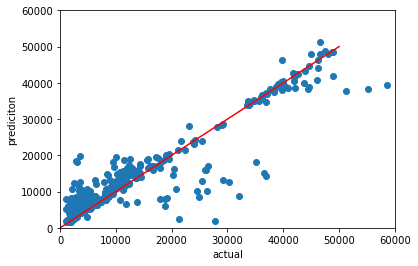

In [53]:
plt.scatter(y_test,y_pred)
plt.plot([0,50000],[0,50000],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 60000) 
plt.ylim(0, 60000) 
plt.show()

In [54]:
r2_4 = r2_score(y_test,y_pred)
rmse_4 = RMSE(y_test,y_pred)
print(r2_4,rmse_4)

0.8621720658262945 4839.807038403653


In [55]:
cv_results = cross_validate(RandomForestRegressor(), X_train, y_train, cv=5)
cv_scores = cv_results['test_score']

cv_scores

array([0.82514259, 0.86540471, 0.82042108, 0.77417882, 0.81724907])

In [56]:
model_1_2.feature_importances_

array([1.37257148e-01, 5.38056846e-03, 2.17470989e-01, 5.93485659e-01,
       6.51164109e-03, 5.93639299e-03, 6.01513908e-03, 3.07422876e-03,
       2.70641585e-03, 5.54265301e-04, 3.14142467e-03, 4.95065015e-03,
       8.11711576e-03, 5.39836162e-03])

14


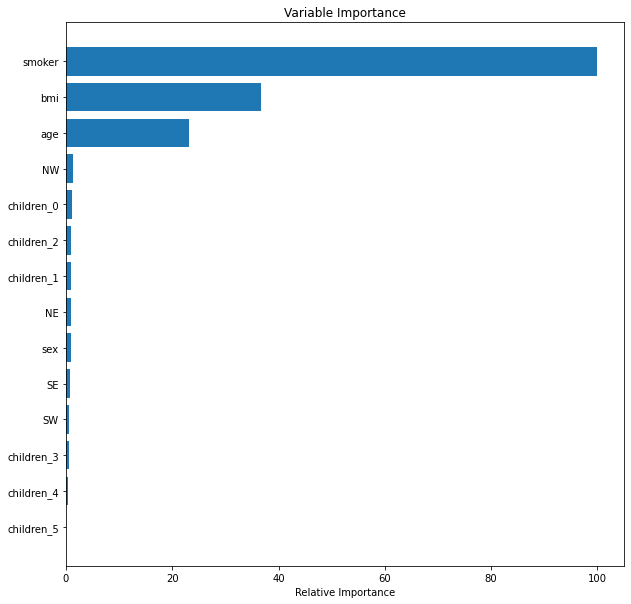

In [58]:
feature_importance = model_1_2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:15]
sorted_idx = np.argsort(feature_importance)[:15]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [59]:
model_1_2 = RandomForestRegressor(n_estimators =rf_cv.best_params_['n_estimators'],  criterion = rf_cv.best_params_['criterion'])
model_1_2.fit(X_train[['age','bmi','smoker','NW','children_0','children_1']],y_train)

RandomForestRegressor(n_estimators=133)

In [60]:
y_pred = model_1_2.predict(X_test[['age','bmi','smoker','NW','children_0','children_1']])

In [61]:
r2_5 = r2_score(y_test,y_pred)
rmse_5 = RMSE(y_test,y_pred)
print(r2_5,rmse_5)

0.8619351716427944 4843.964504432534


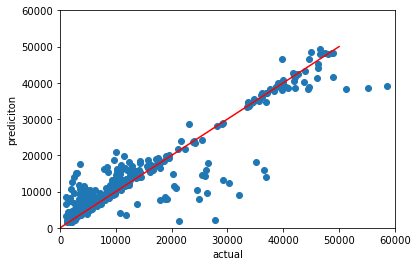

In [62]:
plt.scatter(y_test,y_pred)
plt.plot([0,50000],[0,50000],c = 'red')
plt.xlabel('actual')
plt.ylabel('prediciton')
plt.xlim(0, 60000) 
plt.ylim(0, 60000) 
plt.show()

In [63]:
rfc1 = RandomForestRegressor(n_estimators =rf_cv.best_params_['n_estimators'],  criterion = rf_cv.best_params_['criterion'])
rfecv1 = RFECV(estimator = rfc1,cv = 5)
rfecv1.fit(X_train,y_train)

RFECV(cv=5, estimator=RandomForestRegressor(n_estimators=133))

In [64]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 6


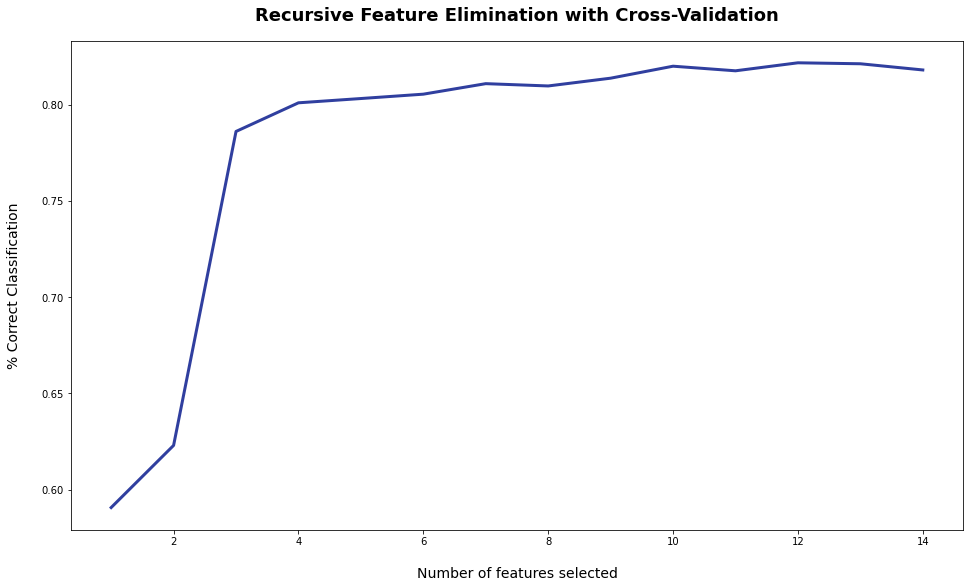

In [65]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv1.grid_scores_) + 1), rfecv1.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

### Summary of Model 1.2

In [66]:
scores_1 = pd.DataFrame(zip(('All Features','Best 6 Features'),(r2_4,r2_5),(rmse_4,rmse_5)),columns=['Model','R2 score','RMSE'],index=np.arange(1,3))
scores_1

,Model,R2 score,RMSE
1,All Features,0.862172,4839.807038
2,Best 6 Features,0.861935,4843.964504


From the above result, the R2 score and RMSE of the two models are very close. Hence,the model adopting best 6 features is selected due to the trade off of accuracy and simplicity

### Conclusion

In [67]:
scores_2 = pd.DataFrame(zip(('Best OLS','Best RF'),(r2_3,r2_5),(rmse_3,rmse_5)),columns=['Model','R2 score','RMSE'],index=np.arange(1,3))
scores_2

,Model,R2 score,RMSE
1,Best OLS,0.785227,6041.561456
2,Best RF,0.861935,4843.964504


Random Forest (adopting best 6 feature) has been selected as the best model